In [1]:
# code modified from JRussellHuffman obtained from https://github.com/JRussellHuffman/joy_vazirani

from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

provider = IBMQ.enable_account('my API token')
backend = provider.get_backend('ibmq_qasm_simulator')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [19]:
n=4

In [20]:
def wordToBV(s) :
    #convert text to binary
    a_byte_array = bytearray(s, "utf8")
    byte_list = []


    for byte in a_byte_array:
        binary_representation = bin(byte)
        byte_list.append(binary_representation[6-n:])
        #chop off the "0b" at the beginning. can also truncate the binary to fit on a device with N qubits
        #binary has 2 extra digits for "0b", so it starts at 9 for our 7 bit operation. 

    print(byte_list)
    
    circuit_array = []
    
    length = len(byte_list) 
    
    for i in range(length):
    
        s = byte_list[i]


        #do all  this stuff for every letter

        # We need a circuit with n qubits, plus one ancilla qubit
        # Also need n classical bits to write the output to
        bv_circuit = QuantumCircuit(n+1, n)

        # put ancilla in state |->
        bv_circuit.h(n)
        bv_circuit.z(n)

        # Apply Hadamard gates before querying the oracle
        for i in range(n):
            bv_circuit.h(i)

        # Apply barrier 
        bv_circuit.barrier()

        # Apply the inner-product oracle
        s = s[::-1] # reverse s to fit qiskit's qubit ordering
        for q in range(n):
            if s[q] == '0':
                bv_circuit.i(q)
            else:
                bv_circuit.cx(q, n)

        # Apply barrier 
        bv_circuit.barrier()

        #Apply Hadamard gates after querying the oracle
        for i in range(n):
            bv_circuit.h(i)

        # Measurement
        for i in range(n):
            bv_circuit.measure(i, i)
            
        circuit_array.append(bv_circuit)

    
    return circuit_array

In [27]:
circuit_to_run = wordToBV('crystal')

['1100011', '1110010', '1111001', '1110011', '1110100', '1100001', '1101100']


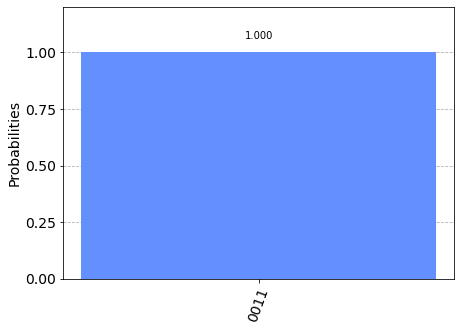

In [28]:
#test
backend = provider.get_backend('ibmq_qasm_simulator')
shots = 4096
results = execute(circuit_to_run[0], backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

hardcoded to run on  ibmq_lima
Job Status: job has successfully run


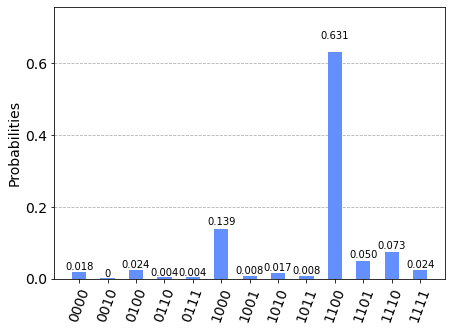

In [35]:
# run in real quantum computer

device = provider.get_backend('ibmq_lima')
print("hardcoded to run on ", device)


from qiskit.tools.monitor import job_monitor
job = execute(circuit_to_run[6], backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

results = job.result()
answer = results.get_counts(circuit_to_run[6])
plot_histogram(answer)

In [117]:
print(answer)

{'0000': 18, '0010': 1, '0100': 25, '0110': 4, '0111': 4, '1000': 142, '1001': 8, '1010': 17, '1011': 8, '1100': 646, '1101': 51, '1110': 75, '1111': 25}


In [124]:
type(answer)

qiskit.result.counts.Counts

In [59]:
import sys

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
import scipy.misc as misc

In [86]:
def load_img(filename):
    img = Image.open(filename)
    data = np.array(img)
    return data

In [87]:
def all_pixels(row, col, square_h, square_w):

    for y in range(int(round(row*square_h)), int(round((row+1)*square_h))):
        for x in range(int(round(col*square_w)), int(round((col+1)*square_w))):
            yield y, x

In [88]:
def square(img, row, col, square_h, square_w):
    
    pixels = []
    
    for y, x in all_pixels(row, col, square_h, square_w):
        pixels.append(img[y][x])
        
    av_r = 0
    av_g = 0
    av_b = 0
    for r, g, b in pixels:
        av_r += r
        av_g += g
        av_b += b
    av_r /= len(pixels)
    av_g /= len(pixels)
    av_b /= len(pixels)
        
        
    for y, x in all_pixels(row, col, square_h, square_w):
        img[y][x] = (av_r, av_g, av_b)
            
    img[][]

In [115]:
if __name__ == "__main__":
    try:
        filename = sys.argv[1]
    except IndexError:
        filename = raw_input("image1.jpg")
    img = load_img('image1.jpg')
    
    num_cols = 8
    square_w = float(img.shape[1]) / num_cols
    num_rows = 14
    square_h = float(img.shape[0]) / num_rows
    
    for row in range(num_rows):
        for col in range(num_cols):
            square(img, row, col, square_h, square_w)

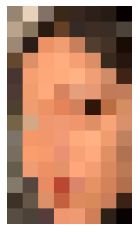

In [116]:
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    

(71, 70, 3)